<a href="https://colab.research.google.com/github/GustavoCervera/Projects/blob/master/ML_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTEBOOK PARA COMPARAÇÃO DE ALGORITMOS DE MACHINE LEARNING PARA O DATASET DE HEART 💗 DISEASE **

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

In [ ]:
heart_full = pd.read_csv("heart_2020_cleaned.csv")
cat_columns = heart_full.select_dtypes('object')
num_columns = heart_full.select_dtypes(exclude='object')

In [ ]:
le = LabelEncoder()
for column in cat_columns:
  cat_columns[column] = le.fit_transform(cat_columns[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
new_heart_full = pd.concat([cat_columns, num_columns],axis=1, join="inner")
y = new_heart_full.HeartDisease
X = new_heart_full.drop(['HeartDisease'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,random_state=0)

**Decision Tree**

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
pred_DT = model_DT.predict(X_valid)
result_DT = accuracy_score(y_valid, pred_DT)
print("O modelo de DECISION TREE apresentou {}% de acurácia.".format((result_DT*100).round(2)))

best_model = {}
best_model["Decision Tree"] = (result_DT*100).round(2)

O modelo de DECISION TREE apresentou 86.33% de acurácia.


**Random Forest**

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
pred_RF = model_RF.predict(X_valid)
result_RF = accuracy_score(y_valid, pred_RF)
print("O modelo de DECISION TREE apresentou {}% de acurácia.".format((result_RF*100).round(2)))

best_model["Random Forest"] = (result_RF*100).round(2)

O modelo de DECISION TREE apresentou 90.67% de acurácia.


**XGBoost**

In [ ]:
model_XB = XGBRegressor(verbosity=0)
model_XB.fit(X_train,y_train)
pred_XB = model_XB.predict(X_valid)
pred_XB = pred_XB.round()
result_XB = accuracy_score(y_valid, pred_XB)
print("O modelo de XGBOOST apresentou {}% de acurácia.".format((result_XB*100).round(2)))

best_model["XGBoost"] = (result_XB*100).round(2)

O modelo de XGBOOST apresentou 91.62% de acurácia.


**BAGGING CLASSIFIER**


In [ ]:
from sklearn.ensemble import BaggingClassifier
model_BC = BaggingClassifier()
model_BC.fit(X_train,y_train)
pred_BC = model_BC.predict(X_valid)
result_BC = accuracy_score(y_valid, pred_BC)
print("O modelo de BAGGING CLASSIFIER apresentou {}% de acurácia.".format((result_BC*100).round(2)))

best_model["Bagging Classifier"] = (result_BC*100).round(2)

O modelo de BAGGING CLASSIFIER apresentou 90.41% de acurácia.


**ADA Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_AB = BaggingClassifier()
model_AB.fit(X_train,y_train)
pred_AB = model_AB.predict(X_valid)
result_AB = accuracy_score(y_valid, pred_AB)
print("O modelo de ADA BOOST apresentou {}% de acurácia.".format((result_AB*100).round(2)))

best_model["ADA Boost"] = (result_AB*100).round(2)

O modelo de ADA BOOST apresentou 90.45% de acurácia.


In [ ]:
keys = list(best_model.keys())
values = list(best_model.values())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


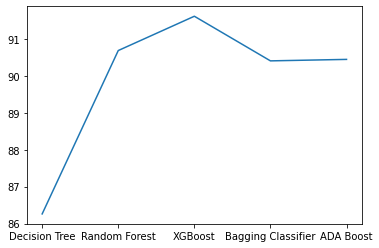

In [ ]:
sns.lineplot(keys, values, )

In [ ]:
!pip install tensorflow

**Neural Network**

In [ ]:
!pip install keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_shape = [X_train.shape[1]]
print(input_shape)

[17]


In [ ]:
model = keras.Sequential([
                          layers.BatchNormalization(input_shape=input_shape),
                          layers.Dropout(0.3),
                          layers.Dense(256, activation='relu'),
                          layers.BatchNormalization(),
                          layers.Dropout(0.3),
                          layers.Dense(256, activation='relu'),
                          layers.BatchNormalization(),
                          layers.Dropout(0.3),
                          layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
      optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy']
)

Epoch 1/200
500/500 [==============================] - 11s 19ms/step - loss: 0.3347 - binary_accuracy: 0.8775 - val_loss: 0.2334 - val_binary_accuracy: 0.9156
Epoch 2/200
500/500 [==============================] - 9s 18ms/step - loss: 0.2544 - binary_accuracy: 0.9121 - val_loss: 0.2335 - val_binary_accuracy: 0.9149
Epoch 3/200
500/500 [==============================] - 9s 18ms/step - loss: 0.2480 - binary_accuracy: 0.9140 - val_loss: 0.2318 - val_binary_accuracy: 0.9149
Epoch 4/200
500/500 [==============================] - 9s 17ms/step - loss: 0.2448 - binary_accuracy: 0.9142 - val_loss: 0.2330 - val_binary_accuracy: 0.9150
Epoch 5/200
500/500 [==============================] - 9s 18ms/step - loss: 0.2441 - binary_accuracy: 0.9143 - val_loss: 0.2338 - val_binary_accuracy: 0.9150
Epoch 6/200
500/500 [==============================] - 9s 18ms/step - loss: 0.2428 - binary_accuracy: 0.9145 - val_loss: 0.2335 - val_binary_accuracy: 0.9154
Epoch 7/200
500/500 [==============================

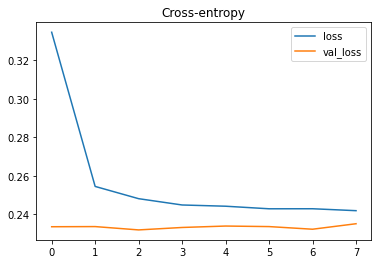

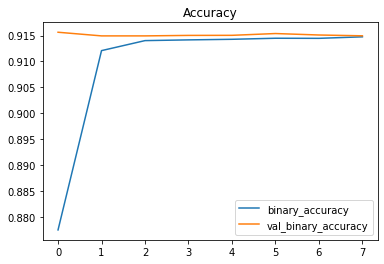

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")